# Data Preprocessing

Data preprocessing is a critical step in the machine learning pipeline. It involves cleaning and transforming raw data into a format suitable for training a machine learning model. Data preprocessing is essential because real-world data can be messy, incomplete, and inconsistent. The goal of data preprocessing is to make the data more understandable and useful for machine learning algorithms.

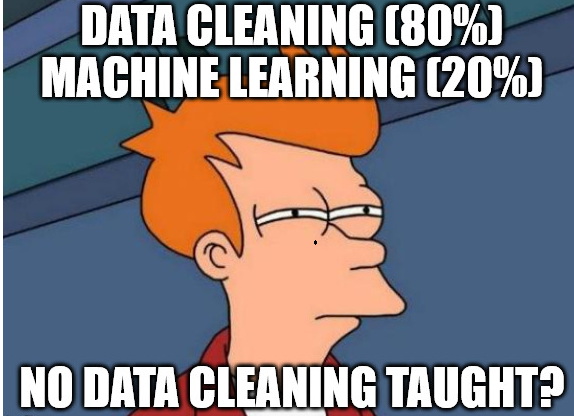

In [1]:
# Import libraries

# linear algebra
import numpy as np 

# data processing
import pandas as pd 

!pip install seaborn
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

zsh:1: /opt/homebrew/bin/pip: bad interpreter: /opt/homebrew/opt/python@3.10/bin/python3.10: no such file or directory


## Import the dataset in the Notebook

In [2]:
"""
Get train and test dataset

write code to bring in train csv file in pandas dataframe (~ 1 line of code)
train_df = #code
write code to bring in test csv file in pandas dataframe (~ 1 line of code)
test_df = #code
"""

# YOUR CODE STARTS HERE
train_df = None
test_df = None
# YOUR CODE ENDS HERE

### Create a new column named relatives

In [3]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

In [4]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1


## Dropping un-necessary columns

We will drop ‘PassengerId’ from the train set, because as discussed earlier it does not contribute to a persons survival probability. We will not drop it from the test set, since it is required there for the submission.

In [5]:
""" 
Drop a specific column ('PassengerId') from the dataframe (~ 1 line of code)

"""

# YOUR CODE STARTS HERE
train_df = None
# YOUR CODE ENDS HERE

In [6]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1


## Missing Data

Cabin          687
Age            177
Embarked         2


### Cabin:

From our previous analysis, we know that there are 687 NaN values in column **Cabin** , 177 NaN values in **Age** column, and 2 NaN values in **Embarked** column.

There is something interesting about Cabin column, value in cabin column looks like **C85**, here letter represents deck and the number is obvious. Let's create a new feature, that contains a passenger's deck, and later we will convert it into a numeric value.

There were 10 decks in total. From top to bottom they were the Boat Deck, the Promenade Deck (deck A), passenger decks B to G, Orlop Deck, and the Tank Top.

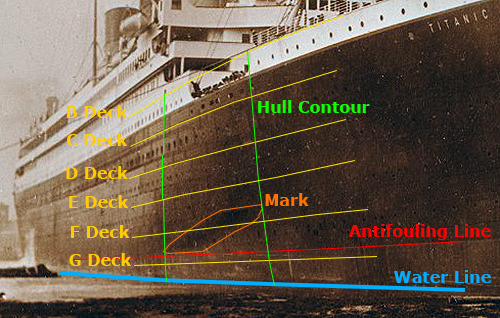

#### fillna() method

The fillna() method is a function in many programming languages, including Python, used to fill or replace missing or NaN (Not-a-Number) values within data structures, like pandas DataFrames, NumPy arrays, and more. Its primary purpose is data imputation, which is the process of replacing missing values with appropriate substitute values.

In Python, it is most commonly used with pandas DataFrames. The basic syntax of fillna() is

`df.fillna(value, method, axis, inplace, limit, downcast)`


In [7]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("UD")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [8]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,1,0
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,1,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,3,0,0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,1,3


### Age

Now we can tackle the issue with the age features missing values. We will create an array that contains random numbers, which are computed based on the mean age value in regards to the standard deviation and `is_null()`.


In [9]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = train_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
    

train_df["Age"].isnull().sum()

0

In [10]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S,0,1,0
887,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S,0,1,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,16,1,2,W./C. 6607,23.4500,S,3,0,0
889,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C,0,1,3


### Embarked

Since the Embarked feature has only 2 missing values, we will just fill these with the most common one

In [11]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

As per the above analysis, we can say Port of Embarked S is the most common

In [12]:
common_embarked = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_embarked)

## Convert features

**Converting features** typically refers to the process of transforming or modifying the input variables (features) of a dataset to make them more suitable for training a machine learning model. 

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int64  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int64  
 12  Deck       891 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


Above we can see that **Fare** is a float and we have to deal with **4 categorical features**: 
1. Name, 
2. Sex, 
3. Ticket, and 
4. Embarked
Lets investigate and transfrom one after another.

### Fare:
Converting “Fare” from float to int64, using the “astype()” function pandas provides

In [14]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [15]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,S,1,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7,S,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,S,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13,S,0,1,0
887,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,S,0,1,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,16,1,2,W./C. 6607,23,S,3,0,0
889,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C,0,1,3


### Name:
We will use the Name feature to extract the Titles from the Name, so that we can build a new feature out of that.

In [16]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [17]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,male,22,1,0,A/5 21171,7,S,1,0,0,1
1,1,1,female,38,1,0,PC 17599,71,C,1,0,3,3
2,1,3,female,26,0,0,STON/O2. 3101282,7,S,0,1,0,2
3,1,1,female,35,1,0,113803,53,S,1,0,3,3
4,0,3,male,35,0,0,373450,8,S,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,211536,13,S,0,1,0,5
887,1,1,female,19,0,0,112053,30,S,0,1,2,2
888,0,3,female,16,1,2,W./C. 6607,23,S,3,0,0,2
889,1,1,male,26,0,0,111369,30,C,0,1,3,1


### Sex
Convert ‘Sex’ feature into numeric.

This code will create a new column called 'Sex' in your DataFrame, where the 'Sex' values are encoded as 0 and 1. Typically, the encoding is done as follows:

1. The first unique value encountered in the column is assigned the label 0.
2. The second unique value encountered is assigned the label 1.

We can access the encoded values in the 'Sex' column, which can then be used as input for machine learning algorithms. This is a common practice when dealing with binary categorical variables in machine learning.

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()

In [20]:
train_df['Sex'] = le.fit_transform(train_df['Sex'])
test_df['Sex'] = le.fit_transform(test_df['Sex'])

In [21]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,1,22,1,0,A/5 21171,7,S,1,0,0,1
1,1,1,0,38,1,0,PC 17599,71,C,1,0,3,3
2,1,3,0,26,0,0,STON/O2. 3101282,7,S,0,1,0,2
3,1,1,0,35,1,0,113803,53,S,1,0,3,3
4,0,3,1,35,0,0,373450,8,S,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,211536,13,S,0,1,0,5
887,1,1,0,19,0,0,112053,30,S,0,1,2,2
888,0,3,0,16,1,2,W./C. 6607,23,S,3,0,0,2
889,1,1,1,26,0,0,111369,30,C,0,1,3,1


In [22]:
train_df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age           int64
SibSp         int64
Parch         int64
Ticket       object
Fare          int64
Embarked     object
relatives     int64
not_alone     int64
Deck          int64
Title         int64
dtype: object

In [23]:
test_df.dtypes

PassengerId     int64
Pclass          int64
Sex             int64
Age             int64
SibSp           int64
Parch           int64
Ticket         object
Fare            int64
Embarked       object
relatives       int64
not_alone       int64
Deck            int64
Title           int64
dtype: object

### Ticket

As per our Analysis, we know this ticket column does not seem to contribute towards a passenger's survival, so we can drop this column

In [24]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [25]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,1,22,1,0,7,S,1,0,0,1
1,1,1,0,38,1,0,71,C,1,0,3,3
2,1,3,0,26,0,0,7,S,0,1,0,2
3,1,1,0,35,1,0,53,S,1,0,3,3
4,0,3,1,35,0,0,8,S,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13,S,0,1,0,5
887,1,1,0,19,0,0,30,S,0,1,2,2
888,0,3,0,16,1,2,23,S,3,0,0,2
889,1,1,1,26,0,0,30,C,0,1,3,1


### Embarked:

Let us convert ‘Embarked’ feature into numeric column, let's find out how many unique values are there in this column

In [26]:
"""
Get the all the unique values in a specific column ('Embarked') (~ 1 line of code)
Hint: Use unique() function of pandas dataframe
"""

# YOUR CODE STARTS HERE

# YOUR CODE ENDS HERE

array(['S', 'C', 'Q'], dtype=object)

We can actually use the same label encoder to convert the categorical column in numerical values (as we did for column SEX), but let's use a map method to execute this task

In [27]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

## Creating Categories

### Age Groups
Now we need to convert the ‘age’ feature. First we will convert it from float to integer. Then we will create the new ‘AgeGroup” column, by categorizing every age into a group. Note that it is important to place attention on how we form these groups, since we don’t want for example that 80% of our data falls into group 1

In [28]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed train_df['Age'].value_counts()

In [29]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,1,2,1,0,7,0,1,0,0,1
1,1,1,0,5,1,0,71,1,1,0,3,3
2,1,3,0,3,0,0,7,0,0,1,0,2
3,1,1,0,5,1,0,53,0,1,0,3,3
4,0,3,1,5,0,0,8,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,3,0,0,13,0,0,1,0,5
887,1,1,0,2,0,0,30,0,0,1,2,2
888,0,3,0,1,1,2,23,0,3,0,0,2
889,1,1,1,3,0,0,30,1,0,1,3,1


### Fare

For the ‘Fare’ feature, we need to do the same as with the ‘Age’ feature. But it isn’t that easy, because if we cut the range of the fare values into a few equally big categories, 80% of the values would fall into the first category. Fortunately, we can use sklearn “qcut()” function, that we can use to see, how we can form the categories.

qcut() is a function used for quantile-based discretization of variables. If you want to use qcut, you should apply it to a pandas DataFrame or a specific column in a DataFrame, not a Series.

In [30]:
train_df['Fare_Per_Person'] = pd.qcut(train_df['Fare'], q=4, labels=False)
test_df['Fare_Per_Person'] = pd.qcut(test_df['Fare'], q=4, labels=False)

In [31]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Fare_Per_Person
0,0,3,1,2,1,0,7,0,1,0,0,1,0
1,1,1,0,5,1,0,71,1,1,0,3,3,3
2,1,3,0,3,0,0,7,0,0,1,0,2,0
3,1,1,0,5,1,0,53,0,1,0,3,3,3
4,0,3,1,5,0,0,8,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,3,0,0,13,0,0,1,0,5,1
887,1,1,0,2,0,0,30,0,0,1,2,2,2
888,0,3,0,1,1,2,23,0,3,0,0,2,2
889,1,1,1,3,0,0,30,1,0,1,3,1,2


In [32]:
# data = [train_df, test_df]
# for dataset in data:
#     dataset['Age_Class']= dataset['Age']* dataset['Pclass']

# Building Machine Learning Models

The Titanic passenger survival prediction problem is typically treated as a classification problem. The primary goal is to predict whether a passenger survived or did not survive (i.e., binary classification) based on various features such as age, gender, ticket class, and more.

In [33]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

## Import necessary libraries

In [34]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

## Stochastic Gradient Descent (SGD)

Stochastic Gradient Descent (SGD) is an optimization algorithm commonly used in machine learning for training various models, particularly in the context of supervised learning, where you have labeled data. It's widely employed for training linear models and neural networks. SGD aims to find the optimal parameters (weights and biases) for a machine learning model that minimizes a given cost or loss function.

Video Link: https://www.youtube.com/watch?v=vMh0zPT0tLI&t=30s

In [35]:
sgd = linear_model.SGDClassifier(max_iter=4, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [36]:
print(acc_sgd)

75.65


## Decision Tree

Decision trees can be used for regression (continuous real-valued output,
e.g. predicting the price of a house) or classification (categorical output,
e.g. predicting email spam vs. no spam), but here we will focus on classification. A decision tree classifier is a binary tree where predictions are made by traversing the tree from root to leaf — at each node, we go left if a feature is less than a threshold, right otherwise. Finally, each leaf is associated with a class, which is the output of the predictor.

Video link: https://www.youtube.com/watch?v=_L39rN6gz7Y

In [37]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [52]:
print(acc_decision_tree)

94.73


## Random Forest

Random Forest is a widely-used machine learning algorithm developed by Leo Breiman and Adele Cutler, which combines the output of multiple decision trees to reach a single result. Its ease of use and flexibility have fueled its adoption, as it handles both classification and regression problems. In this article, we will understand how random forest algorithm works, how it differs from other algorithms and how to use it.

Video Link: https://www.youtube.com/watch?v=J4Wdy0Wc_xQ (Part 1)
Video Link: https://www.youtube.com/watch?v=sQ870aTKqiM (Part 2)

In [38]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [39]:
print(acc_random_forest)

94.73


## Logistic Regression

Logistic regression is used to predict the categorical dependent variable. It's used when the prediction is categorical, for example, yes or no, true or false, 0 or 1. For instance, insurance companies decide whether or not to approve a new policy based on a driver's history, credit history and other such factors

Video Link: https://www.youtube.com/watch?v=yIYKR4sgzI8

In [40]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
print(acc_log)

81.93


## K Nearest Neighbor

The K-Nearest Neighbor algorithm works well for classification if the right k value is chosen.

Video link: https://www.youtube.com/watch?v=HVXime0nQeI&t=1s

In [42]:
acc = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,Y_train)
    yhat = knn.predict(X_test)
    acc.append(round(knn.score(X_train, Y_train) * 100, 2))
    print("For k = ",i," : ",round(knn.score(X_train, Y_train) * 100, 2))

For k =  1  :  92.48
For k =  2  :  86.87
For k =  3  :  85.86
For k =  4  :  84.4
For k =  5  :  82.94
For k =  6  :  83.05
For k =  7  :  81.82
For k =  8  :  80.92
For k =  9  :  81.59
For k =  10  :  81.03
For k =  11  :  80.25
For k =  12  :  80.13
For k =  13  :  80.47
For k =  14  :  79.69
For k =  15  :  80.81
For k =  16  :  80.02
For k =  17  :  79.8
For k =  18  :  78.56
For k =  19  :  79.57


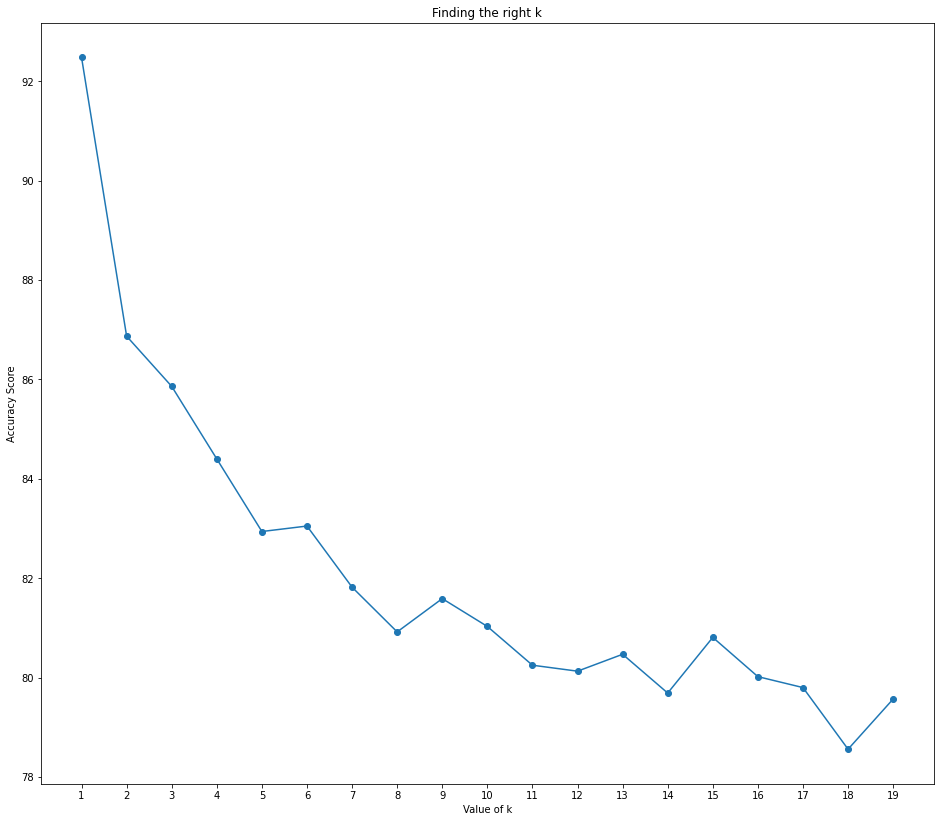

In [43]:
plt.figure(figsize=(16,14))
plt.plot(range(1,20),acc, marker = "o")
plt.xlabel("Value of k")
plt.ylabel("Accuracy Score")
plt.title("Finding the right k")
plt.xticks(range(1,20))
plt.show()

In [44]:
knn = KNeighborsClassifier(n_neighbors = 1) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)


In [45]:
print(acc_knn)

92.48


## Which is the best Model out of these 8 models

In [53]:
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_knn, acc_log, 
              acc_random_forest,
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
94.73,Random Forest
94.73,Decision Tree
92.48,KNN
81.93,Logistic Regression
79.24,Naive Bayes
79.24,Perceptron
79.12,Support Vector Machines
75.65,Stochastic Gradient Decent


From the above dynamics we can say Random Forest Out perform on titanic dataset. 

## Random Forest


The random-forest algorithm brings extra randomness into the model, when it is growing the trees. Instead of searching for the best feature while splitting a node, it searches for the best feature among a random subset of features. This process creates a wide diversity, which generally results in a better model. Therefore when you are growing a tree in random forest, only a random subset of the features is considered for splitting a node. You can even make trees more random, by using random thresholds on top of it, for each feature rather than searching for the best possible thresholds (like a normal decision tree does).


Another great quality of random forest is that they make it very easy to measure the relative importance of each feature. Sklearn measure a features importance by looking at how much the treee nodes, that use that feature, reduce impurity on average (across all trees in the forest). It computes this score automaticall for each feature after training and scales the results so that the sum of all importances is equal to 1. We will acces this below:

In [54]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.182
Sex,0.174
Fare,0.158
Age,0.125
Pclass,0.078
Deck,0.073
relatives,0.054
Fare_Per_Person,0.046
Embarked,0.039


<AxesSubplot:xlabel='feature'>

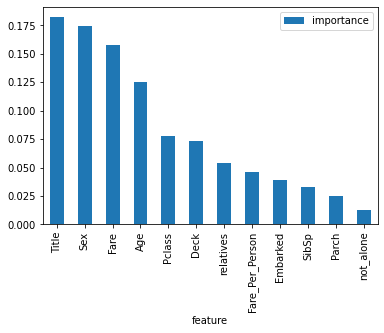

In [55]:
importances.plot.bar()

In [56]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)
Y_train_pred = random_forest.predict(X_train)
random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

94.73 %


Reference document: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### Plot confusion matrix 
A confusion matrix gives you a lot of information about how well your model does, but theres a way to get even more, like computing the classifiers precision.


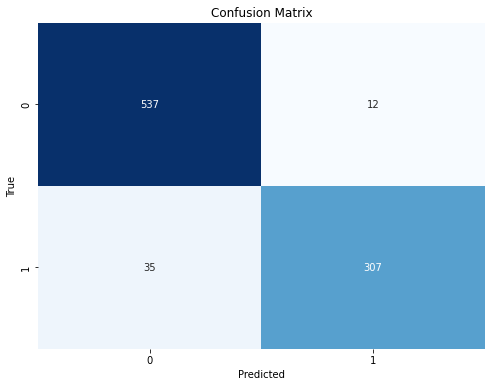

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_train, Y_train_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

The first row is about the not-survived-predictions: 539 passengers were correctly classified as not survived (called true negatives) and 10 where wrongly classified as not survived (false positives).

The second row is about the survived-predictions: 35 passengers were wrongly classified as survived (false negatives) and 307 where correctly classified as survived (true positives).

### Precision and Recall of the model

Our model predicts 96.84% of the time, a passengers survival correctly (precision). The recall tells us that it predicted the survival of 89.76 % of the people who actually survived.

In [58]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, Y_train_pred))
print("Recall:",recall_score(Y_train, Y_train_pred))


Precision: 0.9623824451410659
Recall: 0.8976608187134503


### F1-Score

We can combine precision and recall into one score, which is called the F1-score. The F1-score is computed with the harmonic mean of precision and recall.

In [59]:
from sklearn.metrics import f1_score
f1_score(Y_train, Y_train_pred)

0.9288956127080181

## Congratulations! Lab1 is Complete

We started with the data exploration where we got a feeling for the dataset, checked about missing data and learned which features are important. During this process we used seaborn and matplotlib to do the visualizations. During the data preprocessing part, we computed missing values, converted features into numeric ones, grouped values into categories and created a few new features. Afterwards we started training 8 different machine learning models, picked one of them (random forest), as it gives best results out there. We also evaluated model's performance using metrics like confusion matrix. Calculated Precision, Recall and F1-Score